# Project Titanic
## Can you "buy" your way into survival?

In this project I will investigate a dataset containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

I will start by giving some basic information like how many men and women were aboard, how many people survived, how many of those were men, how many women etc. This will give a general idea of what the dataset looks like. It will also indicate if there are any major discrepancies or "noise" in the data.  

Next I will dive deeper into the data to answer a few questions I am interested in and in conclusion I will present me finding.

### Goal
The goal of this project is to showcase my data analysis skills (methods, code writing, analysis quality etc.). The questions, analysis and conclusions serve that purpose.    

## Questions


1. Which gender was more likely to survive?
1. What age group was more likely to survive?
3. Which ticket class was more likely to survive?
4. Which price range was more likely to survive?

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import unicodecsv
import scipy.stats as sp

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Preview the data
pd.read_csv('titanic_data.csv').head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Dictionary

|Variable|Definition   |                    Key
|--------|:-----------:|
|Survived|Survival     |	                0 = No, 1 = Yes
|Pclass  |Ticket Class |	                1 = 1st, 2 = 2nd, 3 = 3rd
|Name    |Name         |
|Sex     |Sex	       |
|Age	 |Age in Years |	
|SibSp	 |# of siblings / spouses aboard the Titanic|	
|Parch   |# of parents / children aboard the Titanic|	
|Ticket  |Ticket Number |	
|Fare    |Passenger Fare|	
|Cabin   |Cabin Number	|
|Embarked|Port of Embarkation|              C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

**pclass:** A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

*Sibling* = brother, sister, stepbrother, stepsister

*Spouse* = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

*Parent* = mother, father

*Child* = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

#### First Impressions
After a quick first inspection the data seems to be quite clean. There are a lot of NaN in the Cabin column, which could be due to the fact that multiple people can reside in one cabin and that each cabin is only has one name attributed to it (the one who paid for it). It could also mean the data is missing. Either way the information in the Cabin column won't be very useful.  

There are a couple of NaN in the Age column. We'll have to take a look at how substantial the amount of missing data is.

## Data Wrangling / Cleaning Phase

In [3]:
titanic_df = pd.read_csv('titanic_data.csv')

Since the Cabin, Embarked, SibSp and Parch are not going to be used in this analysis I will remove them.

In [4]:
titanic_df = titanic_df.drop(['Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


There are 177 entries missing in the Age column. That is quite a few, so I have two choices: treat the missing values as outliers or replace all the NaN values with an average age. I will replace the NaN's with the average age based on Sex and Pclass.

In [5]:
mean_ages = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()

def replace_nan(row):
   '''
   Function to replace NaN with the means from mean_ages.
   '''
   if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
   else:
        return row['Age']

titanic_df['Age'] =titanic_df.apply(replace_nan, axis=1)

I have noticed that multiple people can travel on the same ticket. To accurately see if a higher price paid results in a larger chance of survival, I will convert the ticket prices to Fare Per Person.

In [6]:
group_by_ticket = titanic_df.groupby(['Ticket']).count().reset_index()
group_by_ticket['#'] = group_by_ticket['PassengerId']

titanic_df = titanic_df.merge(group_by_ticket[['Ticket','#']], how='left', on='Ticket')
titanic_df['Fare_Per_Person'] = titanic_df['Fare'] / titanic_df['#']

I will also group ticket fares into price ranges/bins.

In [7]:
price_bins = [0,7,8,9,15,20,30,40,50,60,70,80,90,150,200,600]
fare_per_person_ranges = titanic_df['PassengerId'].groupby(pd.cut(titanic_df['Fare_Per_Person'], price_bins, include_lowest=True))

In [8]:
price_ranges = titanic_df['PassengerId'].groupby(pd.cut(titanic_df['Fare'], price_bins, include_lowest=True))

To make analysis easier I will group ages together in age groups/bins.

In [9]:
age_bins = [0,10,20,30,40,50,60,70,80]
age_groups = titanic_df['PassengerId'].groupby(pd.cut(titanic_df["Age"], age_bins))

Now that the data has been cleaned up, questions regarding the data can be answered.

## Questions

### Which gender was more likely to survive?

In [10]:
group_by_gender = titanic_df['PassengerId'].groupby(titanic_df['Sex'])
group_by_gender_survivors = titanic_df['Survived'].groupby(titanic_df["Sex"]).sum()
gender_survivors_percentage = (group_by_gender_survivors / group_by_gender.count()) *100

In [11]:
d_gender = {'Total': group_by_gender.count(),
                 'Survivors': group_by_gender_survivors,
                  'Percentage': gender_survivors_percentage
                 }
                  
gender_df = pd.DataFrame(data = d_gender)
print gender_df

        Percentage  Survivors  Total
Sex                                 
female   74.203822        233    314
male     18.890815        109    577


Of the 891 people on board 314 were women and 577 men.  
342 people survived (38.4%), 549 perished (61.6%).  
Of the suvivors 233 were female (68.1%) and 109 were male (31.9%).  
74.2% of the women survived, while only 18.9% of the men did.  

### What age group was more likely to survive?

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64


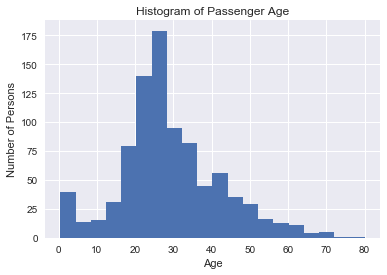

In [12]:
print titanic_df['Age'].describe()
titanic_df['Age'].plot(kind='hist', bins= 20)
plt.xlabel("Age")
plt.ylabel("Number of Persons")
plt.title("Histogram of Passenger Age")

As we can see here the average age was 29 years old.  
The youngest was 0.42 years old (5 months), and the oldest was 80 years old.  
Most were between 20 and 30 years of age.  

In [13]:
age_groups_survivors = titanic_df['Survived'].groupby(pd.cut(titanic_df['Age'],age_bins)).sum()
age_groups_percentage = (age_groups_survivors / age_groups.count()) * 100

In [14]:
d_age_groups ={'Percentage': age_groups_percentage,
    'Total': age_groups.count(),
   'Survivors': age_groups_survivors,
   }

age_groups_df = pd.DataFrame(data=d_age_groups)
age_groups_df

,Percentage,Survivors,Total
Age,,,
"(0, 10]",59.375000,38,64
"(10, 20]",38.260870,44,115
"(20, 30]",32.608696,120,368
"(30, 40]",46.242775,80,173
"(40, 50]",35.514019,38,107
"(50, 60]",40.476190,17,42
"(60, 70]",23.529412,4,17
"(70, 80]",20.000000,1,5


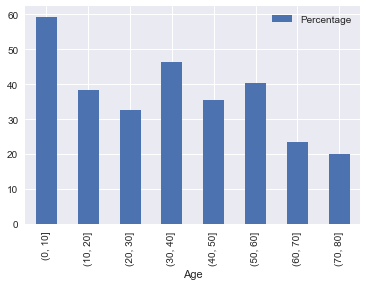

In [15]:
age_groups_df.plot(kind='bar', x = age_groups_df.index, y = 'Percentage')

The age group with the highest survival rate was younger than 11 years old. The age groups with the most casualties were the elderly (>60) and 21-30.  
We can also see that there is a downward slope in the graph, meaning that the higher the age, the lower the chance of survival is.

In [16]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Age'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)

print ['Chi-Squared Test',chi2]
print ['P-Value', p]

['Chi-Squared Test', 169.18703895811601]
['P-Value', 2.3494808822678941e-06]


Seeing as the P-value for the Chi-Square test is smaller than 0.05, it is safe to say that age definitely affects the rate of survival.  

### Which ticket class was more likely to survive?

In [17]:
group_by_ticket_class = titanic_df['PassengerId'].groupby(titanic_df['Pclass'])
group_by_ticket_class_survivors = titanic_df['Survived'].groupby(titanic_df["Pclass"]).sum()
ticket_class_survivors_percentage = (group_by_ticket_class_survivors / group_by_ticket_class.count()) *100

In [18]:
d_ticket_class = {'Total': group_by_ticket_class.count(),
                 'Survivors': group_by_ticket_class_survivors,
                  'Percentage': ticket_class_survivors_percentage
                 }
                  
ticket_class_df = pd.DataFrame(data = d_ticket_class)
ticket_class_df

,Percentage,Survivors,Total
Pclass,,,
1,62.962963,136,216
2,47.282609,87,184
3,24.236253,119,491


While almost 63% of the passengers with upper class tickets survived the disaster, only 24.2% of the lower class ticket holders survived. The middle class is right in between with 47.3%.  

In [19]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Pclass'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)

print ['Chi-Squared Test',chi2]
print ['P-Value', p]

['Chi-Squared Test', 102.88898875696056]
['P-Value', 4.5492517112987927e-23]


Here too we can see that the P-value is significantly smaller than 0.05, which means that ticket class and survival rate are correlated.

### Which price range was more likely to survive?

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


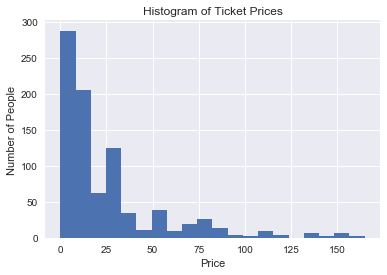

In [20]:
print titanic_df['Fare'].describe()
titanic_df['Fare'][titanic_df['Fare'] < 200].plot(kind='hist', bins= 20)
plt.xlabel("Price")
plt.ylabel("Number of People")
plt.title("Histogram of Ticket Prices")

The average price paid per ticket was 32.20 dollars.  
Some people got free trips, which I imagine means they were crew members or winners of free tickets.  
The most expensive ticket was 512.33 dollars.  
Most tickets were sold at prices between 0 and 10 dollars.

In [21]:
price_ranges_survivors = titanic_df['Survived'].groupby(pd.cut(titanic_df['Fare'],price_bins, include_lowest=True)).sum()
price_ranges_percentage = (price_ranges_survivors / price_ranges.count()) * 100

In [22]:
d_price_ranges ={
    'Percentage': price_ranges_percentage,
    'Total': price_ranges.count(),
   'Survivors': price_ranges_survivors,
   }

price_ranges_df = pd.DataFrame(data=d_price_ranges)
price_ranges_df

,Percentage,Survivors,Total
Fare,,,
"(-0.001, 7.0]",7.142857,2,28
"(7.0, 8.0]",23.474178,50,213
"(8.0, 9.0]",13.888889,10,72
"(9.0, 15.0]",35.862069,52,145
"(15.0, 20.0]",50.877193,29,57
"(20.0, 30.0]",44.366197,63,142
"(30.0, 40.0]",39.655172,23,58
"(40.0, 50.0]",25.000000,4,16
"(50.0, 60.0]",71.052632,27,38


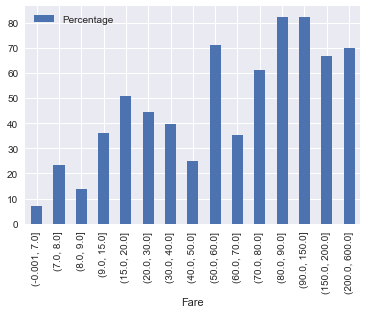

In [23]:
price_ranges_df.plot(kind='bar',x = price_ranges_df.index, y ='Percentage')

Looking at the graph, we can see an upward slope showing us that the higher the ticket prices, the higher the survival rate. 

In [24]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Fare'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)

print ['Chi-Squared Test',chi2]
print ['P-Value', p]

['Chi-Squared Test', 425.80838057911058]
['P-Value', 1.1647635739939964e-11]


The P-value being significantly smaller than 0.05 means that indeed ticket price and survival are correlated.

#### Fare Per Person

Since the data set shows price per ticket, and it is possible for multiple people to travel on the same ticket, I want to convert the ticket prices to price per person and do the same analysis as before. I expect the graphs to look almost the same, but for showcasing purposes I will do the analysis anyway.

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
max      221.779200
Name: Fare_Per_Person, dtype: float64


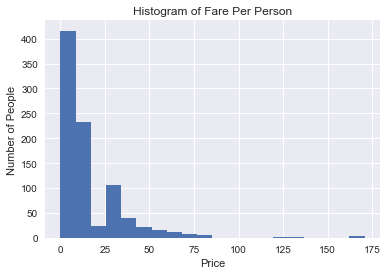

In [25]:
print titanic_df['Fare_Per_Person'].describe()
titanic_df['Fare_Per_Person'][titanic_df['Fare_Per_Person'] < 200].plot(kind='hist', bins= 20)
plt.xlabel("Price")
plt.ylabel("Number of People")
plt.title("Histogram of Fare Per Person")

The average price paid per person was 17.79 dollars.  
The highest price paid by a person was 221.78 dollars.  
Most people paid less than 10 dollars for a ticket.  

In [28]:
fare_per_person_ranges_survivors = titanic_df['Survived'].groupby(pd.cut(titanic_df['Fare_Per_Person'],price_bins, include_lowest=True)).sum()
fare_per_person_ranges_percentage = (fare_per_person_ranges_survivors / fare_per_person_ranges.count()) * 100

In [30]:
d_fare_per_person_ranges ={
    'Percentage': fare_per_person_ranges_percentage,
    'Total': fare_per_person_ranges.count(),
   'Survivors': fare_per_person_ranges_survivors,
   }

fare_per_person_ranges_df = pd.DataFrame(data=d_fare_per_person_ranges)
fare_per_person_ranges_df


,Percentage,Survivors,Total
Fare_Per_Person,,,
"(-0.001, 7.0]",22.988506,20,87
"(7.0, 8.0]",26.274510,67,255
"(8.0, 9.0]",22.727273,25,110
"(9.0, 15.0]",38.674033,70,181
"(15.0, 20.0]",42.857143,12,28
"(20.0, 30.0]",64.705882,66,102
"(30.0, 40.0]",55.319149,26,47
"(40.0, 50.0]",65.384615,17,26
"(50.0, 60.0]",60.000000,12,20


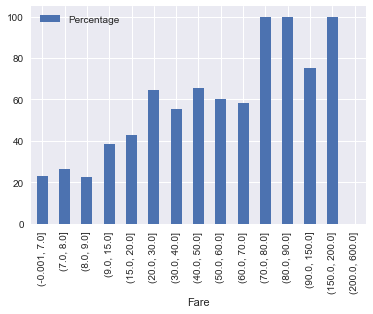

In [32]:
fare_per_person_ranges_df.plot(kind='bar',x = price_ranges_df.index, y ='Percentage')

The graph is indeed similar to the one before, eventhough this one is a bit smoother. As expected it has an upward slope, meaning the higher the price paid per person, the higher the survival rate.

In [33]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Fare_Per_Person'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)

print ['Chi-Squared Test',chi2]
print ['P-Value', p]

['Chi-Squared Test', 418.05053913314634]
['P-Value', 6.0693104384080361e-11]


The Chi-Squared Test confirms there being a relationship between price per person and survival rate.

## Conclusion

After analyzing the data there are a three things that can be concluded.   

First of all the term: 'women and children first' seems to apply to the titanic situation. Significantly more women survived the disaster than men, while the highest survival rate was amongst children aged 0-10.  

Secondly we can say that there is a stong correlation between class and survival rate. That does not mean that buying a higher class ticket increases your chances of survival, since it could simply be that for example there were more families with young children or more women in the upper class. To find causation in the correlation more analysis must be done.  

Lastly, a higher ticket price/price per person correlates with a higher survival rate. Which is a logical conclusion considering the fact that higher class tickets are usually more expensive and a higher class seems to correlate with a higher rate of survival.   

